In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.optimize as optimize
import pandas as pd
import seaborn as sns

In [2]:
#No editing needed
force = np.array([0.04, 0.07, 0.16, 0.4, 0.6, 1, 1.4, 2, 4, 6]) #values from column A in the excel
Vmax = 100
Km_predicted = 1

In [3]:
#Defining functions

def Ascend(x):
    '''ascend(x) returns values if the number of hits for the different filaments is in ascending order'''
    if x[0] <= x[1] <= x[2] <= x[3] <= x[4] <= x[5] <= x[6] <= x[7] <= x[8] <= x[9]:
        return(x)
    
    else:
        x[9] = 6
        x[0] = np.floor((x[0]+x[1])/2)
        x[1] = np.floor((x[1]+x[2])/2)
        x[2] = np.floor((x[2]+x[3])/2)
        x[3] = np.floor((x[3]+x[4])/2)
        x[4] = np.floor((x[4]+x[5])/2)
        x[5] = np.floor((x[5]+x[6])/2)
        x[6] = np.floor((x[6]+x[7])/2)
        x[7] = np.floor((x[7]+x[8])/2)
        x[8] = np.floor((x[8]+x[9])/2)
        return(x)

In [4]:
def Per_Tot(x):
    per_tot = [round((x*100)/6,2) for x in x]
    return per_tot

In [5]:
#Enter the total value for each corresponding force for each animal (RD_2R, HFD_0 refers to the animal ID, two different examples to try the code)
# The list is basically the numbers from column H in the excel sheet - the total


RD_1L = [0,0,1,1,2,3,3,3,5,6]
RD_1R = [0,0,1,1,2,2,3,3,5,6]
# RD_0  = []
RD_2L = [0,0,0,0,2,2,2,4,5,6]
# RD_2R = []

HFD_1L = [0,0,0,2,4,4,6,6,6,6]
HFD_1R = [0,0,1,0,3,4,6,6,6,6]
HFD_0 =  [0,0,1,3,5,6,6,6,6,6]
HFD_2L = [0,0,1,0,4,6,6,6,6,6]
HFD_2R = [0,0,0,4,4,6,6,6,6,6]


##### After treatment(_t) (eg: Saline or Beta-alanine)

RD_1L_t = [0,0,4,5,5,6,6,6,6,6]
RD_1R_t = [0,0,1,6,6,6,6,6,6,6]
# RD_0_t =  []
RD_2L_t = [0,0,0,2,2,1,2,4,5,6]
# RD_2R_t = []


HFD_1L_t = [0,0,3,2,3,1,0,1,6,6]
HFD_1R_t = [0,0,3,5,1,4,6,6,6,6]
HFD_0_t =  [0,0,3,5,4,4,6,6,6,6]
HFD_2L_t = [0,0,1,2,3,3,5,6,6,6]
HFD_2R_t = [0,0,3,3,3,4,6,6,6,6]


In [6]:
Ascend(RD_1L)
Ascend(RD_1R)
# Ascend(RD_0)
Ascend(RD_2L)
# Ascend(RD_2R)

Ascend(HFD_1L)
Ascend(HFD_1R)
Ascend(HFD_0)
Ascend(HFD_2L)
Ascend(HFD_2R)

###After treatment

Ascend(RD_1L_t)
Ascend(RD_1R_t)
# Ascend(RD_0_t)
Ascend(RD_2L_t)
# Ascend(RD_2R_t)

Ascend(HFD_1L_t)
Ascend(HFD_1R_t)
Ascend(HFD_0_t)
Ascend(HFD_2L_t)
Ascend(HFD_2R_t)

[0, 0, 3, 3, 3, 4, 6, 6, 6, 6]

In [7]:
RD_1L = Per_Tot(RD_1L)
RD_1R = Per_Tot(RD_1R)
# RD_0 = Per_Tot(RD_0)
RD_2L = Per_Tot(RD_2L)
# RD_2R = Per_Tot(RD_2R)

HFD_1L = Per_Tot(HFD_1L)
HFD_1R = Per_Tot(HFD_1R)
HFD_0 = Per_Tot(HFD_0)
HFD_2L = Per_Tot(HFD_2L)
HFD_2R = Per_Tot(HFD_2R)

###After treatment

RD_1L_t = Per_Tot(RD_1L_t)
RD_1R_t = Per_Tot(RD_1R_t)
# RD_0_t = Per_Tot(RD_0_t)
RD_2L_t = Per_Tot(RD_2L_t)
# RD_2R_t = Per_Tot(RD_2R_t)

HFD_1L_t = Per_Tot(HFD_1L_t)
HFD_1R_t = Per_Tot(HFD_1R_t)
HFD_0_t = Per_Tot(HFD_0_t)
HFD_2L_t = Per_Tot(HFD_2L_t)
HFD_2R_t = Per_Tot(HFD_2R_t)

In [8]:
#Enter the first argument in the lambda function
RD_1L_Vest = lambda Km: ((RD_1L - Vmax*force/(Km + force))**2).sum()
RD_1R_Vest = lambda Km: ((RD_1R - Vmax*force/(Km + force))**2).sum()
# RD_0_Vest = lambda Km: ((RD_0 - Vmax*force/(Km + force))**2).sum()
RD_2L_Vest = lambda Km: ((RD_2L - Vmax*force/(Km + force))**2).sum()
# RD_2R_Vest = lambda Km: ((RD_2R - Vmax*force/(Km + force))**2).sum()

HFD_1L_Vest = lambda Km: ((HFD_1L - Vmax*force/(Km + force))**2).sum()
HFD_1R_Vest = lambda Km: ((HFD_1R - Vmax*force/(Km + force))**2).sum()
HFD_0_Vest = lambda Km: ((HFD_0 - Vmax*force/(Km + force))**2).sum()
HFD_2L_Vest = lambda Km: ((HFD_2L - Vmax*force/(Km + force))**2).sum()
HFD_2R_Vest = lambda Km: ((HFD_2R - Vmax*force/(Km + force))**2).sum()

RD_1L_Vest(1)
RD_1R_Vest(1)
# RD_0_Vest(1)
RD_2L_Vest(1)
# RD_2R_Vest(1)

HFD_1L_Vest(1)
HFD_1R_Vest(1)
HFD_0_Vest(1)
HFD_2L_Vest(1)
HFD_2R_Vest(1)

###After treatment
RD_1L_t_Vest = lambda Km: ((RD_1L_t - Vmax*force/(Km + force))**2).sum()
RD_1R_t_Vest = lambda Km: ((RD_1R_t - Vmax*force/(Km + force))**2).sum()
# RD_0_t_Vest = lambda Km: ((RD_0_t - Vmax*force/(Km + force))**2).sum()
RD_2L_t_Vest = lambda Km: ((RD_2L_t - Vmax*force/(Km + force))**2).sum()
# RD_2R_t_Vest = lambda Km: ((RD_2R_t - Vmax*force/(Km + force))**2).sum()

HFD_1L_t_Vest = lambda Km: ((HFD_1L_t - Vmax*force/(Km + force))**2).sum()
HFD_1R_t_Vest = lambda Km: ((HFD_1R_t - Vmax*force/(Km + force))**2).sum()
HFD_0_t_Vest = lambda Km: ((HFD_0_t - Vmax*force/(Km + force))**2).sum()
HFD_2L_t_Vest = lambda Km: ((HFD_2L_t - Vmax*force/(Km + force))**2).sum()
HFD_2R_t_Vest = lambda Km: ((HFD_2R_t - Vmax*force/(Km + force))**2).sum()

RD_1L_t_Vest(1)
RD_1R_t_Vest(1)
# RD_0_t_Vest(1)
RD_2L_t_Vest(1)
# RD_2R_t_Vest(1)

HFD_1L_t_Vest(1)
HFD_1R_t_Vest(1)
HFD_0_t_Vest(1)
HFD_2L_t_Vest(1)
HFD_2R_t_Vest(1)

5713.1571833455955

In [9]:
RD_1L_Km_p = optimize.minimize(RD_1L_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
RD_1R_Km_p = optimize.minimize(RD_1R_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
# RD_0_Km_p = optimize.minimize(RD_0_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
RD_2L_Km_p = optimize.minimize(RD_2L_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
# RD_2R_Km_p = optimize.minimize(RD_2R_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')

HFD_1L_Km_p = optimize.minimize(HFD_1L_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_1R_Km_p = optimize.minimize(HFD_1R_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_0_Km_p = optimize.minimize(HFD_0_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_2L_Km_p = optimize.minimize(HFD_2L_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_2R_Km_p = optimize.minimize(HFD_2R_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')

RD_1L_Km = RD_1L_Km_p.x
RD_1R_Km = RD_1R_Km_p.x
# RD_0_Km =  RD_0_Km_p.x
RD_2L_Km = RD_2L_Km_p.x
# RD_2R_Km = RD_2R_Km_p.x

HFD_1L_Km = HFD_1L_Km_p.x
HFD_1R_Km = HFD_1R_Km_p.x
HFD_0_Km =  HFD_0_Km_p.x
HFD_2L_Km = HFD_2L_Km_p.x
HFD_2R_Km = HFD_2R_Km_p.x


###After treatment
RD_1L_t_Km_p = optimize.minimize(RD_1L_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
RD_1R_t_Km_p = optimize.minimize(RD_1R_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
# RD_0_t_Km_p = optimize.minimize(RD_0_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
RD_2L_t_Km_p = optimize.minimize(RD_2L_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
# RD_2R_t_Km_p = optimize.minimize(RD_2R_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')

HFD_1L_t_Km_p = optimize.minimize(HFD_1L_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_1R_t_Km_p = optimize.minimize(HFD_1R_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_0_t_Km_p = optimize.minimize(HFD_0_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_2L_t_Km_p = optimize.minimize(HFD_2L_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')
HFD_2R_t_Km_p = optimize.minimize(HFD_2R_t_Vest,Km_predicted,bounds=[[0,np.inf]],method='L-BFGS-B')

RD_1L_t_Km = RD_1L_t_Km_p.x
RD_1R_t_Km = RD_1R_t_Km_p.x
# RD_0_t_Km =  RD_0_t_Km_p.x
RD_2L_t_Km = RD_2L_t_Km_p.x
# RD_2R_t_Km = RD_2R_t_Km_p.x

HFD_1L_t_Km = HFD_1L_t_Km_p.x
HFD_1R_t_Km = HFD_1R_t_Km_p.x
HFD_0_t_Km =  HFD_0_t_Km_p.x
HFD_2L_t_Km = HFD_2L_t_Km_p.x
HFD_2R_t_Km = HFD_2R_t_Km_p.x

In [10]:
summary = pd.DataFrame({"RD_1L":  [RD_1L_Km[0],RD_1L_t_Km[0]],
                        "RD_1R":  [RD_1R_Km[0],RD_1R_t_Km[0]],
                        "RD_2L":  [RD_2L_Km[0],RD_2L_t_Km[0]],
                        "HFD_1L": [HFD_1L_Km[0],HFD_1L_t_Km[0]],
                        "HFD_1R": [HFD_1R_Km[0],HFD_1R_t_Km[0]],
                        "HFD_0":  [HFD_0_Km[0], HFD_0_t_Km[0]],
                        "HFD_2L": [HFD_2L_Km[0], HFD_2L_t_Km[0]],
                        "HFD_2R": [HFD_2R_Km[0], HFD_2R_t_Km[0]]})

In [11]:
summary = summary.transpose().reset_index().rename(columns={"index": "Animal ID", 0: "Baseline", 1: "Treatment"})
summary["Percentage change"] = round((summary["Baseline"] - summary["Treatment"])*100, 2)

In [12]:
summary

,Animal ID,Baseline,Treatment,Percentage change
0,RD_1L,1.226065,0.155093,107.10
1,RD_1R,1.378134,0.185917,119.22
2,RD_2L,1.552269,1.402903,14.94
3,HFD_1L,0.452671,1.943784,-149.11
4,HFD_1R,0.507540,0.274328,23.32
5,HFD_0,0.280071,0.183845,9.62
6,HFD_2L,0.344310,0.560262,-21.60
7,HFD_2R,0.306980,0.334303,-2.73


In [13]:
saline_RD = summary.loc[(summary["Animal ID"] == "RD_2L"), :]

ba_RD = summary.loc[(summary["Animal ID"] == "RD_1L") | (summary["Animal ID"] == "RD_1R"), :]

saline_HFD = summary.loc[(summary["Animal ID"] == "HFD_2L") | (summary["Animal ID"] == "HFD_0")]

ba_HFD = summary.loc[(summary["Animal ID"] == "HFD_1L") | (summary["Animal ID"] == "HFD_1R")| \
                     (summary["Animal ID"] == "HFD_2R") ]

In [14]:
saline_RD_summary = round(saline_RD.mean(), 2)
saline_HFD_summary = round(saline_HFD.mean(), 2)
ba_RD_summary = round(ba_RD.mean(), 2)
ba_HFD_summary = round(ba_HFD.mean(), 2)

In [15]:
saline_RD

,Animal ID,Baseline,Treatment,Percentage change
2,RD_2L,1.552269,1.402903,14.94


Text(0, 0.5, 'Percent Change (%)')

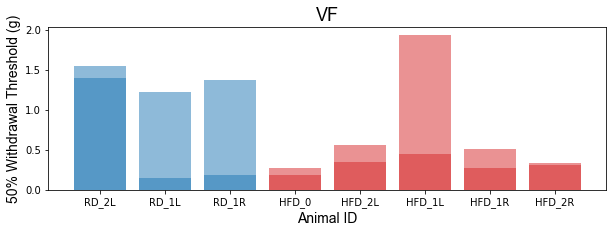

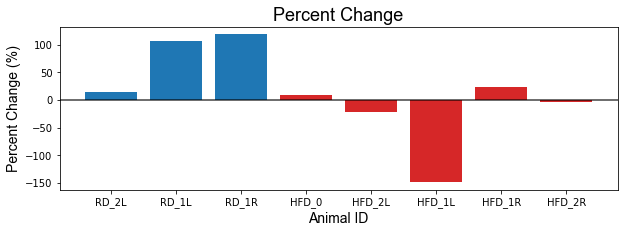

In [16]:
plt.figure(figsize=(10,3))
plt.tight_layout()

         
plt.bar(saline_RD["Animal ID"], saline_RD["Baseline"], color="C0", alpha=0.5)
plt.bar(saline_RD["Animal ID"], saline_RD["Treatment"], color="C0", alpha=0.5)
plt.bar(ba_RD["Animal ID"], ba_RD["Baseline"], color="C0", alpha=0.5)
plt.bar(ba_RD["Animal ID"], ba_RD["Treatment"], color="C0", alpha=0.5)
plt.bar(saline_HFD["Animal ID"], saline_HFD["Baseline"], color="C3", alpha=0.5)
plt.bar(saline_HFD["Animal ID"], saline_HFD["Treatment"], color="C3", alpha=0.5)
plt.bar(ba_HFD["Animal ID"], ba_HFD["Baseline"], color="C3", alpha=0.5)
plt.bar(ba_HFD["Animal ID"], ba_HFD["Treatment"], color="C3", alpha=0.5)

# Formatting
plt.title("VF", fontsize=18, fontname="arial")
plt.xlabel("Animal ID", fontsize=14, fontname="arial")
plt.ylabel("50% Withdrawal Threshold (g)", fontsize=14, fontname="arial")


plt.figure(figsize=(10,3))
plt.tight_layout()

plt.axhline(0, color='k', alpha=0.75)

plt.bar(saline_RD["Animal ID"], saline_RD["Percentage change"], color="C0")
plt.bar(ba_RD["Animal ID"], ba_RD["Percentage change"], color="C0")
plt.bar(saline_HFD["Animal ID"], saline_HFD["Percentage change"], color="C3")
plt.bar(ba_HFD["Animal ID"], ba_HFD["Percentage change"], color="C3")
plt.title("Percent Change", fontsize=18, fontname="arial")
plt.xlabel("Animal ID", fontsize=14, fontname="arial")
plt.ylabel("Percent Change (%)", fontsize=14, fontname="arial")




<Figure size 432x288 with 0 Axes>

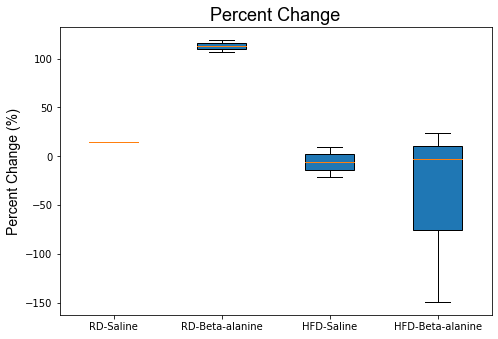

In [17]:
## combine these different collections into a list
plt.tight_layout()
data_to_plot = [saline_RD["Percentage change"], ba_RD["Percentage change"], saline_HFD["Percentage change"], ba_HFD["Percentage change"]]

fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
labels = ["RD-Saline", "RD-Beta-alanine", "HFD-Saline", "HFD-Beta-alanine"]
# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, labels=labels, boxprops=dict(facecolor="C0"))
plt.title("Percent Change", fontsize=18, fontname="arial")
plt.ylabel("Percent Change (%)", fontsize=14, fontname="arial")

plt.show()


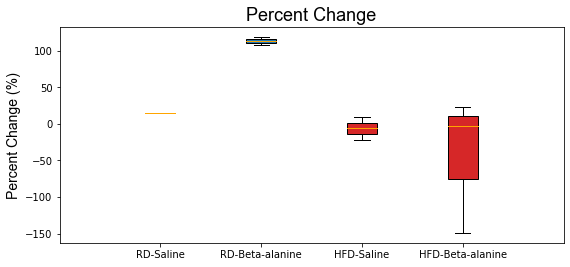

In [18]:
## combine these different collections into a list
data_to_plot = [saline_RD["Percentage change"], ba_RD["Percentage change"]]
data_to_plot_2 = [saline_HFD["Percentage change"], ba_HFD["Percentage change"]]

fig = plt.figure(figsize=(7,3))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
labels_1 = ["RD-Saline", "RD-Beta-alanine"]
labels_2 = ["HFD-Saline", "HFD-Beta-alanine"]

# Create the boxplot
bp = ax.boxplot(data_to_plot, positions=[0.5,1], patch_artist=True, boxprops=dict(facecolor="C0"), labels=labels_1, medianprops=dict(color="orange"))
bp = ax.boxplot(data_to_plot_2, positions=[1.5,2], patch_artist=True, boxprops=dict(facecolor="C3"), labels=labels_2, medianprops=dict(color="orange"))
plt.title("Percent Change", fontsize=18, fontname="arial")
plt.ylabel("Percent Change (%)", fontsize=14, fontname="arial")

plt.savefig("Percent Change", dpi=300)
plt.show()

In [19]:
treatment_summary = pd.DataFrame({"RD_Saline":  saline_RD_summary,
                                  "RD_Beta-alanine":  ba_RD_summary,
                                  "HFD_Saline": saline_HFD_summary,
                                  "HFD_Beta-alanine": ba_HFD_summary})
treatment_summary = treatment_summary.transpose().reset_index().rename(columns={"index": "Average"})

In [20]:
treatment_summary

,Average,Baseline,Treatment,Percentage change
0,RD_Saline,1.55,1.40,14.94
1,RD_Beta-alanine,1.30,0.17,113.16
2,HFD_Saline,0.31,0.37,-5.99
3,HFD_Beta-alanine,0.42,0.85,-42.84


In [21]:
with pd.ExcelWriter('Exp_256_VF_output.xlsx') as writer:
    summary.to_excel(writer, sheet_name='summary.csv', index=False)
    saline_RD.to_excel(writer, sheet_name='RD_saline.csv', index=False)
    ba_RD.to_excel(writer, sheet_name='RD_ba.csv', index=False)
    saline_HFD.to_excel(writer, sheet_name='HFD_saline.csv', index=False)
    ba_HFD.to_excel(writer, sheet_name='HFD_ba.csv', index=False)
    treatment_summary.to_excel(writer, sheet_name='treatment_summary', index=False)